In [1]:
from fastai.vision.all import *
import torch

In [2]:
dls = ImageDataLoaders.from_csv(path='.', csv_fname='train_files.csv', valid_pct=0.1)

In [3]:
learn = cnn_learner(dls, resnet50, pretrained=False, metrics=accuracy, cbs=ShowGraphCallback())

0.0030199517495930195

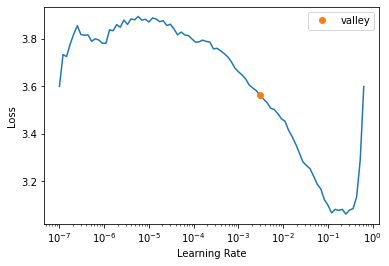

In [4]:
lr = learn.lr_find()
lr = lr[0]
lr

epoch,train_loss,valid_loss,accuracy,time
0,0.501395,0.464341,0.844667,01:08
1,0.423913,0.410890,0.853333,01:09
2,0.502573,0.422428,0.852333,01:09
3,0.333579,0.303544,0.887333,01:09
4,0.313365,0.276152,0.903333,01:08
5,0.291385,0.277326,0.898667,01:08
6,0.276998,0.261721,0.902333,01:09
7,0.241883,0.241242,0.913167,01:09
8,0.249055,0.245652,0.909667,01:09
9,0.222177,0.238214,0.915500,01:09


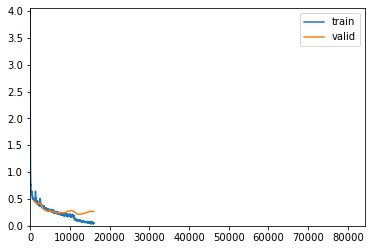

Epoch 12: reducing lr to 0.0003019951749593019
Epoch 17: reducing lr to 3.0199517495930192e-05
No improvement since epoch 14: early stopping


In [5]:
learn.fit(
    n_epoch=100,
    lr=lr,
    cbs=[
        ReduceLROnPlateau(monitor='valid_loss', min_delta=0.001, patience=3),
        EarlyStoppingCallback(monitor='valid_loss', min_delta=0.001, patience=5)
    ]
)

In [6]:
test_df = pd.read_csv('./test_files.csv')
test_files = test_df['LOCAL_FILE_PATH'].values

In [7]:
test_dl = dls.test_dl(test_files)

In [8]:
preds = learn.get_preds(dl=test_dl)

In [9]:
fastai_results = pd.DataFrame(columns=['LOCAL_FILE_PATH', 'FASTAI_PRED'])
for i in range(0, len(test_files)):
    test_file = test_files[i]
    pred = torch.argmax(preds[0][i]).item()
    fastai_results = fastai_results.append({'LOCAL_FILE_PATH': test_file, 'FASTAI_PRED': pred}, ignore_index=True)

In [10]:
fastai_results.to_csv('./fastai_test_results.csv', index=False)